# Predicting Obesity Levels Through EDA and Machine Learning Model Comparison

### **Project Goal**

The goal of this project is to leverage exploratory data analysis (EDA) and machine learning techniques to predict obesity levels in individuals based on their lifestyle, eating habits, and physical condition. This project aims to compare multiple classification models, optimize their performance through hyperparameter tuning, and select the best-performing model to provide actionable insights into factors contributing to obesity.

---

### **About the Data**

The dataset used in this project includes information for estimating obesity levels in individuals from Mexico, Peru, and Colombia. It captures a combination of eating habits, physical activity, and lifestyle data to explore potential contributors to obesity.

Key details about the dataset:
- **Size**: 2,111 records with 17 attributes.
- **Label**: The target variable, **NObesity (Obesity Level)**, categorizes individuals into seven classes:
  - Insufficient Weight
  - Normal Weight
  - Overweight Level I
  - Overweight Level II
  - Obesity Type I
  - Obesity Type II
  - Obesity Type III
- **Synthetic Data**: 77% of the data was generated synthetically using the Weka tool with the SMOTE filter to balance the classes. The remaining 23% was collected directly from users via a web platform.

This dataset provides an excellent foundation for applying EDA techniques to uncover patterns in obesity levels and developing robus

### Features and Descriptions

| Variable Name | Role | Variable Type | Description | 
| :- | :- | :- | :- |
| Gender | Feature | Categorical | Gender of the individual (Male/Female). | 
| Age | Feature | Integer | Age of the individual in years. | 
| Height | Feature | Float | Height of the individual in meters. |
| Weight | Feature | Float | Weight of the individual in kilograms. |
| family_history_with_overweight | Feature | Categorical | Indicates if a family member has suffered or currently suffers from overweight (Yes/No). |
| FAVC | Feature | Categorical | Indicates frequent consumption of high-calorie food (Yes/No). |
| FCVC | Feature | Ordinal | Frequency of vegetable consumption in meals (Low/Medium/High). |
| NCP | Feature | Ordinal | Number of main meals consumed daily (e.g., 1, 2, 3). |
| CAEC | Feature | Ordinal | Frequency of consuming food between meals (Never/Sometimes/Frequently/Always). |
| SMOKE | Feature | Categorical | Indicates whether the individual smokes (Yes/No). |
| CH20 | Feature | Ordinal | Daily water consumption level (Low/Medium/High). |
| SCC | Feature | Categorical | Indicates whether the individual monitors daily calorie intake (Yes/No). |
| FAF | Feature | Ordinal | Frequency of physical activity per week (e.g., 0, 1, 2, 3 or more hours). |
| TUE | Feature | Ordinal | Daily usage of technological devices in hours (e.g., 0, 1–2, 3–4, 5+ hours). |
| CALC | Feature | Ordinal | Frequency of alcohol consumption (Never/Sometimes/Frequently/Always). |
| MTRANS | Feature | Categorical | Usual mode of transportation (e.g., Walking, Biking, Public Transport, Car, Motorbike). |
| NObeyesdad | Target | Categorical | Obesity level, classified as: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. |
 classification models.


### Library Imports

For this project, we will leverage a variety of Python libraries to facilitate data preprocessing, exploratory data analysis (EDA), machine learning model development, and evaluation. These libraries ensure an efficient workflow and provide tools for creating insightful visualizations and accurate predictive models.


In [2]:
# Library Imports
# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Model evaluation and metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
)

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer
from imblearn.over_sampling import SMOTE

# For saving and loading models
import joblib

# Other utilities
import warnings
warnings.filterwarnings("ignore")

# Random state for reproducibility
RANDOM_STATE = 42


### Dataset Overview

Before diving into analysis and modeling, we will explore the dataset to:
- Understand its structure and size.
- Preview the data and assess data types.
- Identify potential issues such as missing values, placeholder values, or inconsistencies.

This initial exploration will guide subsequent data cleaning and preprocessing steps, ensuring a solid foundation for building machine learning models.

---

### Loading and Exploring the Data

In this step, the dataset is loaded and its structure is explored to gain an initial understanding. Key actions include:

1. **Loading the Dataset**: The obesity dataset will be loaded into a pandas DataFrame.
2. **Inspecting the Data**: A quick look at the first few rows will help understand the dataset's format and contents.
3. **Generating a Summary Table**: We will create a comprehensive summary table to:
   - Display data types and counts.
   - Calculate the percentage of unique values and missing values.
   - Analyze the range (minimum and maximum) for numerical columns.
   - Assess correlations between features and the target variable (`NObeyesdad`).
4. **Checking for Duplicates**: Duplicate rows will be identified and removed to ensure data integrity.
5. **Documenting Initial Observations**: Highlight key insights or issues discovered during this step.

The dataset's final dimensions after cleaning will be displayed for reference before proceeding to further analysis.


In [4]:
# Load the dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"  # Update this with the correct file path
data = pd.read_csv(file_path)

# Inspect the dataset structure
print("Dataset Shape:", data.shape)
print("\nFirst Five Rows of the Dataset:")
display(data.head())

print("\nDataset Info:")
data.info()

# Generate a summary table
def generate_summary_table(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.count(),
        'Unique Values': df.nunique(),
        'Missing Values': df.isnull().sum(),
        'Missing Percentage (%)': (df.isnull().sum() / len(df)) * 100
    })
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    summary['Min'] = df[numerical_columns].min()
    summary['Max'] = df[numerical_columns].max()
    return summary

print("\nSummary Table:")
summary_table = generate_summary_table(data)
display(summary_table)

# Check for duplicates
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")
if duplicate_rows > 0:
    data = data.drop_duplicates()
    print(f"Dataset Shape After Removing Duplicates: {data.shape}")

# Initial observations
print("\nInitial Observations:")
print("- No major issues detected." if duplicate_rows == 0 else "- Duplicate rows were removed.")
print("- Review the summary table for missing values or data type inconsistencies.")


Dataset Shape: (2111, 17)

First Five Rows of the Dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                

,Data Type,Non-Null Count,Unique Values,Missing Values,Missing Percentage (%),Min,Max
Gender,object,2111,2,0,0.0,NaN,NaN
Age,float64,2111,1402,0,0.0,14.00,61.00
Height,float64,2111,1574,0,0.0,1.45,1.98
Weight,float64,2111,1525,0,0.0,39.00,173.00
family_history_with_overweight,object,2111,2,0,0.0,NaN,NaN
FAVC,object,2111,2,0,0.0,NaN,NaN
FCVC,float64,2111,810,0,0.0,1.00,3.00
NCP,float64,2111,635,0,0.0,1.00,4.00
CAEC,object,2111,4,0,0.0,NaN,NaN
SMOKE,object,2111,2,0,0.0,NaN,NaN



Number of Duplicate Rows: 24
Dataset Shape After Removing Duplicates: (2087, 17)

Initial Observations:
- Duplicate rows were removed.
- Review the summary table for missing values or data type inconsistencies.


### Initial Observations and Insights

1. **Dataset Shape**:
   - The dataset originally contained **2111 rows** and **17 columns**.
   - After removing **24 duplicate rows**, the dataset now consists of **2087 rows**.

2. **Missing Values**:
   - No missing values were detected in any column. All features have a 0% missing percentage.

3. **Data Types**:
   - The dataset contains a mix of numerical (`float64`) and categorical (`object`) variables.
   - Numerical variables include features such as `Age`, `Height`, `Weight`, and several behavioral metrics (`FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`).
   - Categorical variables include features like `Gender`, `family_history_with_overweight`, and `NObeyesdad` (target variable).

4. **Target Variable**:
   - The target variable, `NObeyesdad`, is categorical with **7 unique classes** representing different obesity levels.

5. **Summary Table Insights**:
   - The numerical features have been checked for minimum and maximum values, which appear consistent with expected ranges.
   - Categorical variables such as `Gender`, `FAVC`, and `MTRANS` have reasonable numbers of unique values, aligning with their respective descriptions.

6. **Next Steps**:
   - Proceed with deeper **EDA** to uncover relationships between features and the target variable.
   - Verify the balance of the target variable classes to determine if class imbalance techniques are needed.
   - Normalize or encode variables as necessary during the preprocessing phase.


# Exploratory Data Analysis (EDA)

## Target Variable Analysis

### Objective
Understanding the distribution of the target variable `NObeyesdad` is critical to identify any class imbalances that may affect model training. This step allows us to assess whether rebalancing techniques or specialized algorithms may be necessary.

### Visualization
The following bar plot shows the distribution of obesity levels in the dataset.


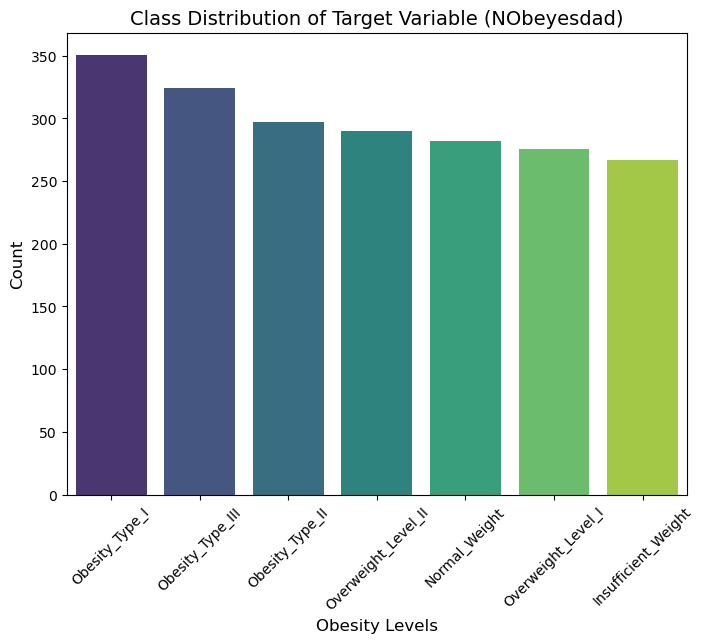

In [8]:
# Analyze Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='NObeyesdad', order=data['NObeyesdad'].value_counts().index, palette="viridis")
plt.title('Class Distribution of Target Variable (NObeyesdad)', fontsize=14)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Observations
- The target variable `NObeyesdad` contains seven distinct classes representing various obesity levels:
  - **Obesity_Type_I** is the most prevalent class.
  - **Obesity_Type_III**, **Obesity_Type_II**, and **Obesity_Type_I** show significant representation.
  - **Normal_Weight** and **Insufficient_Weight** are less frequent, indicating a potential class imbalance.

### Insights
- Class imbalance should be addressed during model training, especially for underrepresented classes such as `Normal_Weight` and `Insufficient_Weight`.
- The representation of all obesity types ensures that the dataset is comprehensive and well-suited for multi-class classification tasks.


## Univariate Analysis

### Objective
In this section, we analyze the distribution of individual features in the dataset to gain insights into their ranges, patterns, and potential anomalies. This helps identify transformations, normalizations, or feature engineering steps needed for modeling.

---

### Numerical Features

We first examine the distributions of numerical features such as `Age`, `Height`, and `Weight`, as well as behavioral metrics like `FCVC` (vegetable consumption) and `FAF` (physical activity). These features are visualized using histograms.


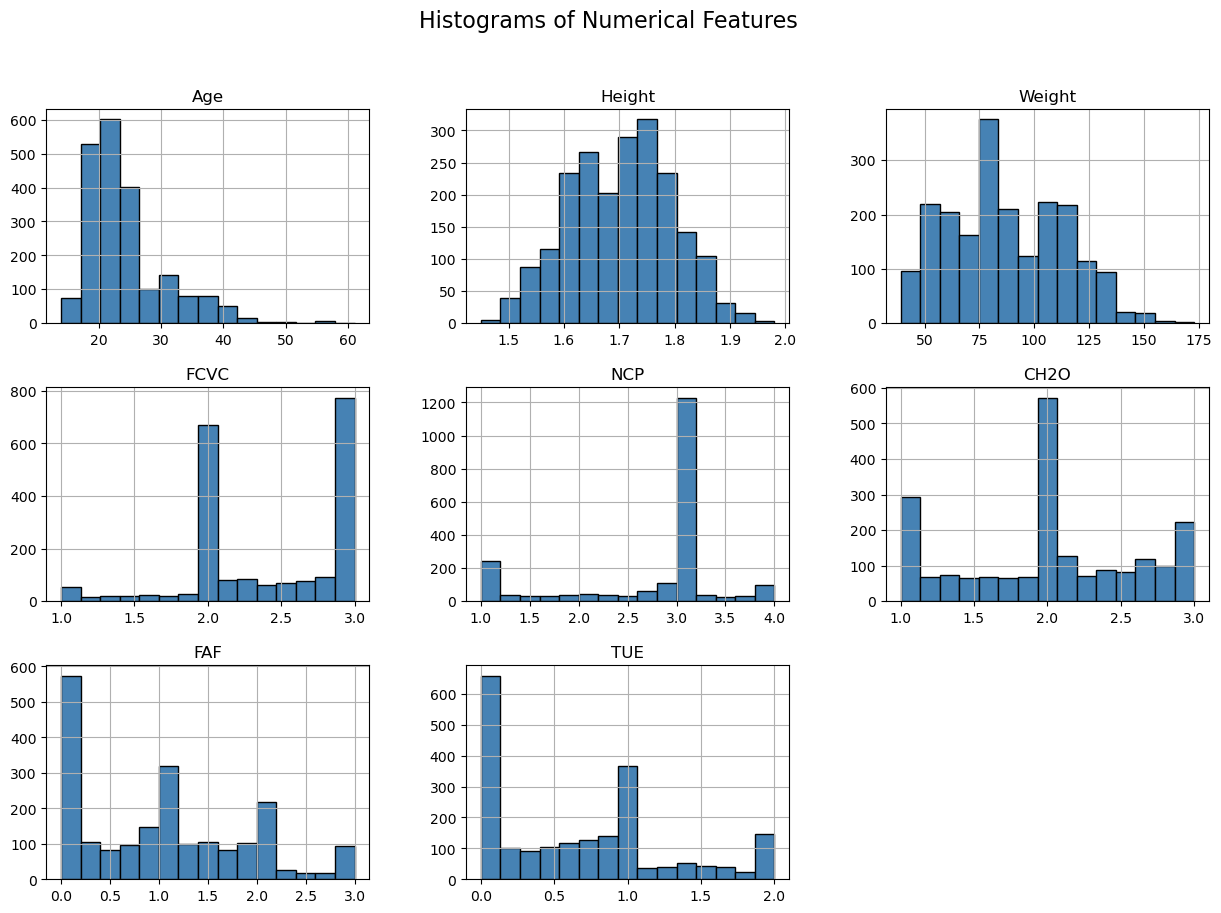

In [12]:
# Univariate Analysis: Numerical Features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Plot histograms for numerical features
data[numerical_features].hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


### Observations
- **Age**: The dataset is skewed toward younger individuals, with most participants between 20 and 40 years old.
- **Height**: Heights are normally distributed around 1.7 meters, with minor outliers at the lower end.
- **Weight**: There is a wide range of weights, with a concentration between 60 and 100 kg.
- **Behavioral Metrics**:
  - `FCVC` and `CH2O` cluster at higher values, indicating frequent vegetable and water consumption.
  - `FAF` (physical activity) is low overall, with many participants reporting no or minimal activity.
  - `TUE` (technology use) shows moderate usage, with peaks around 1–2 hours daily.


---

### Categorical Features

Next, we analyze the distribution of categorical features such as `Gender`, `FAVC` (high-caloric food consumption), and `MTRANS` (transportation mode). Bar plots are used for visualization.


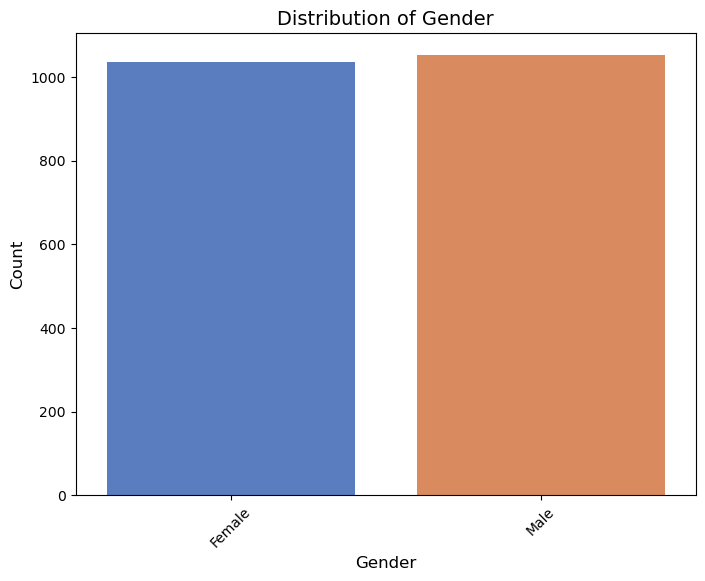

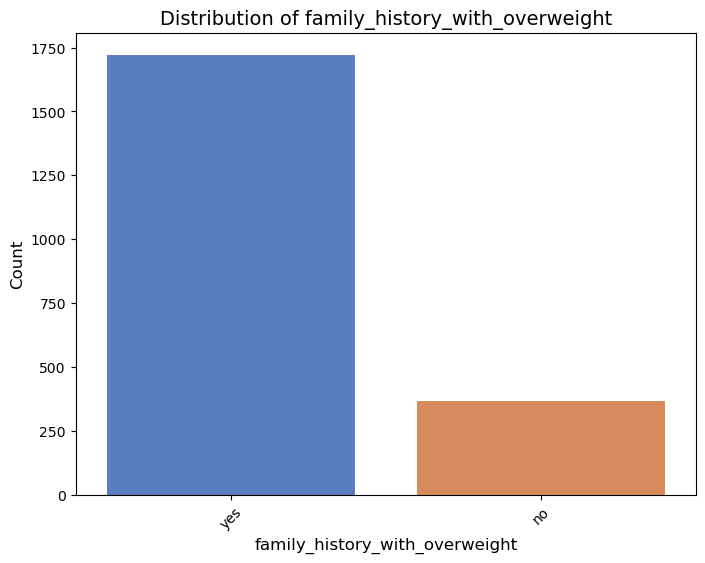

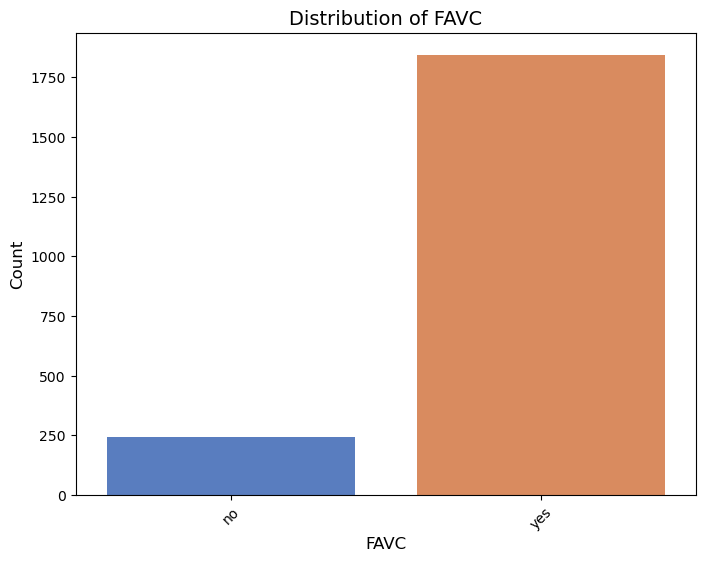

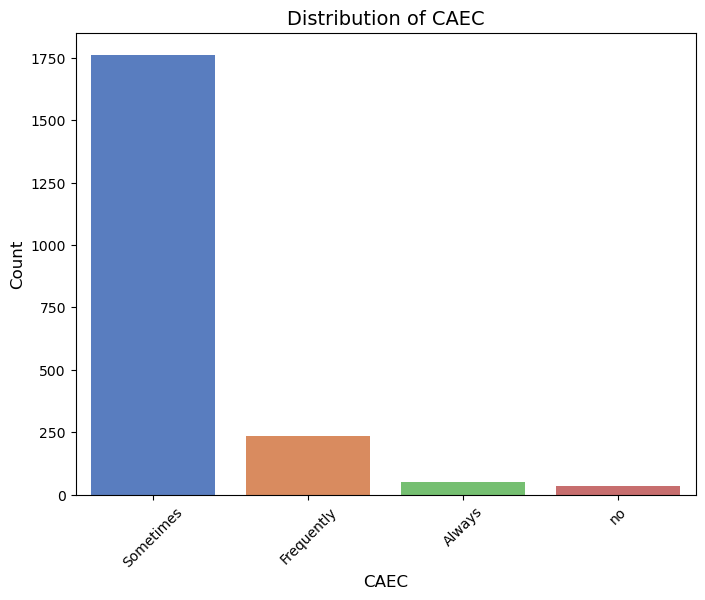

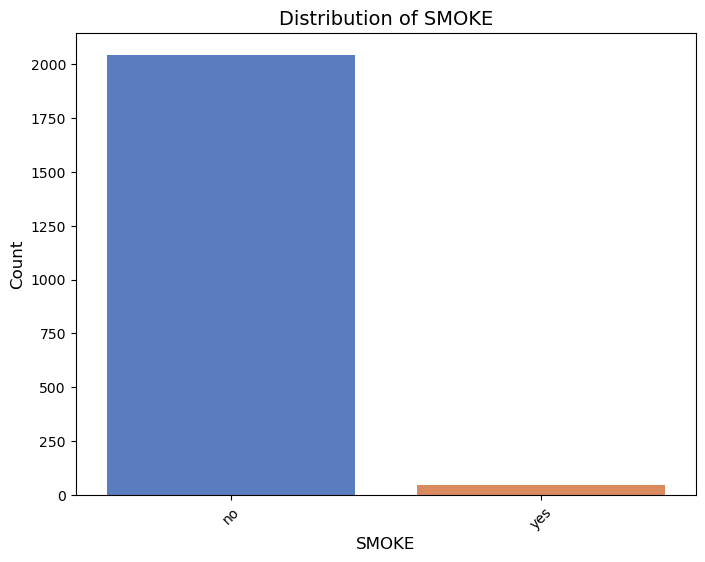

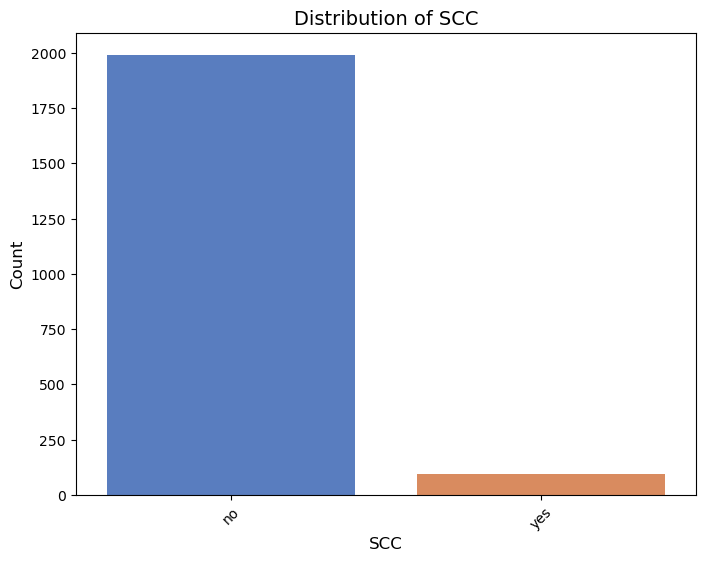

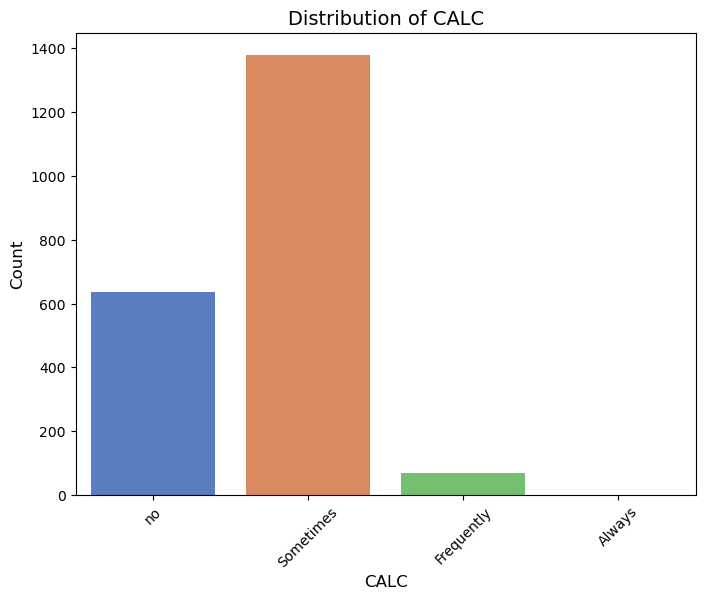

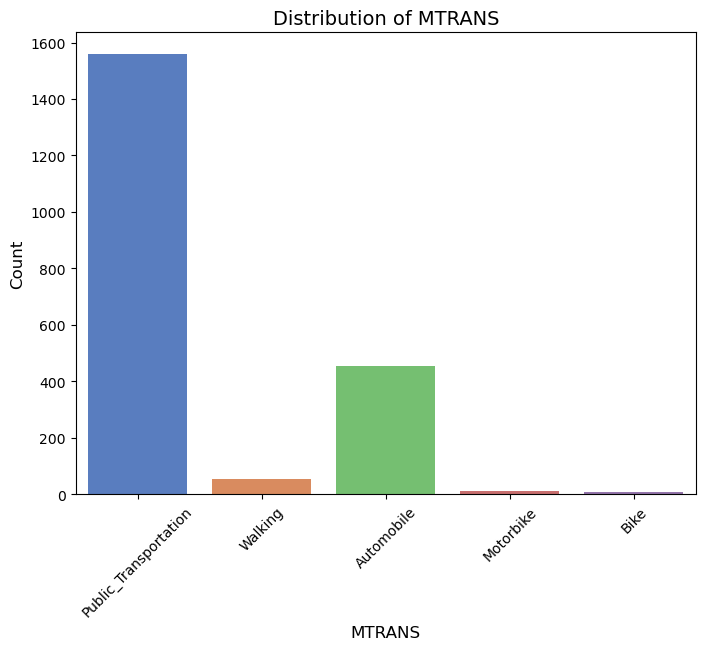

In [16]:
# Univariate Analysis: Categorical Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Plot countplots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, palette="muted")
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


### Observations
- **Gender**: The dataset has an almost equal split between males and females.
- **Family History**: A significant majority report a family history of overweight, indicating a strong hereditary component.
- **FAVC (High-Caloric Food Consumption)**: High-caloric food consumption is prevalent among most participants.
- **MTRANS (Mode of Transportation)**: Public transportation is the most common mode, while active transportation like walking is less frequent.
- **SMOKE and SCC**:
  - Smoking is rare, with minimal representation in the dataset.
  - Calorie monitoring (`SCC`) is uncommon across the board.


## Bivariate Analysis

### Objective
In this section, we explore relationships between individual features and the target variable (`NObeyesdad`). This helps identify significant predictors of obesity levels and provides insights into patterns across different obesity classes.

---

### Numerical Features vs. Obesity Levels

We examine the distribution of numerical features such as `Age`, `Height`, and `Weight` across obesity levels using boxplots. These visualizations help identify trends and variations in these features for different obesity classes.


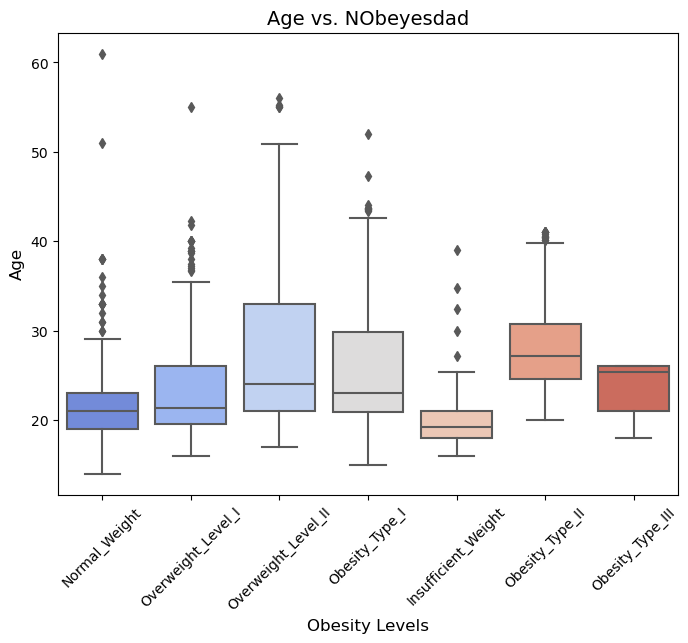

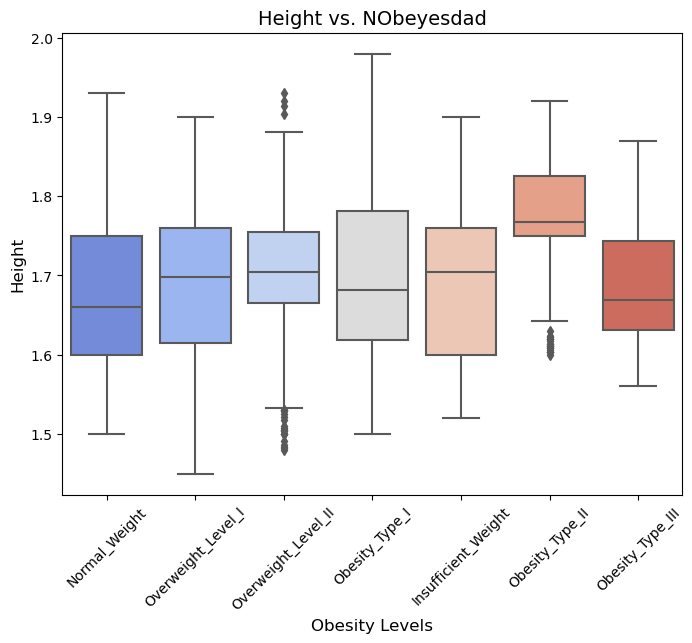

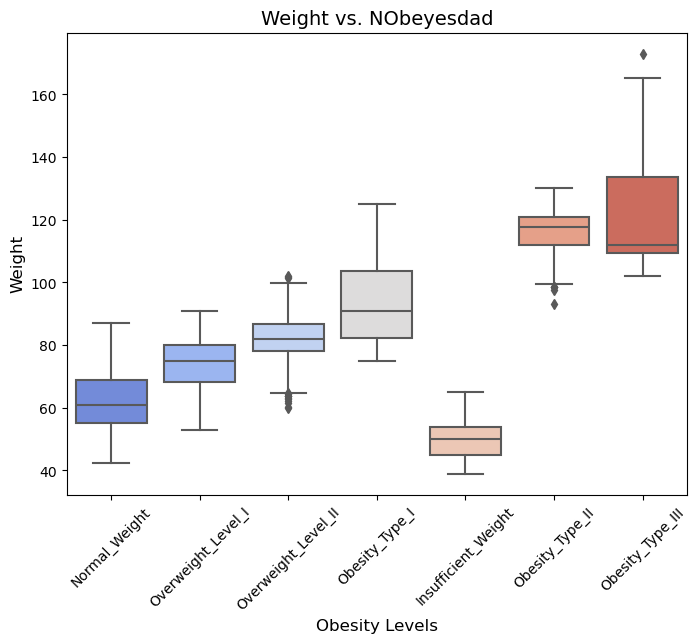

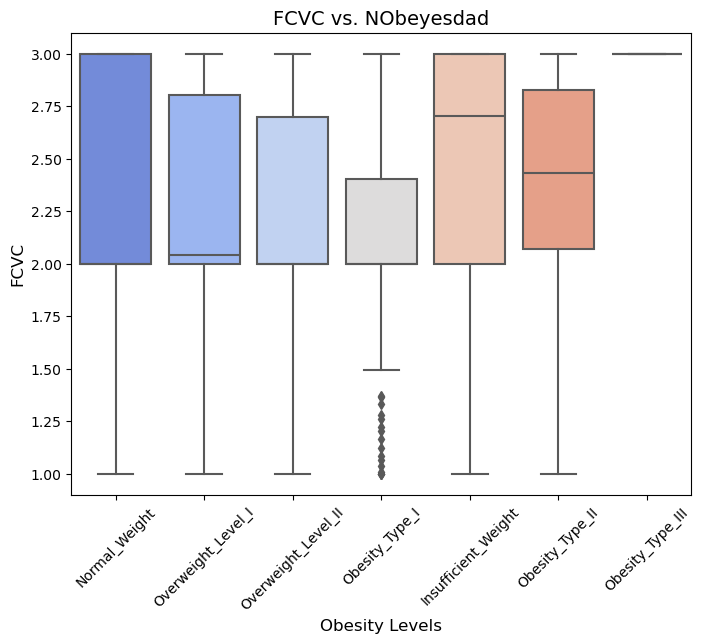

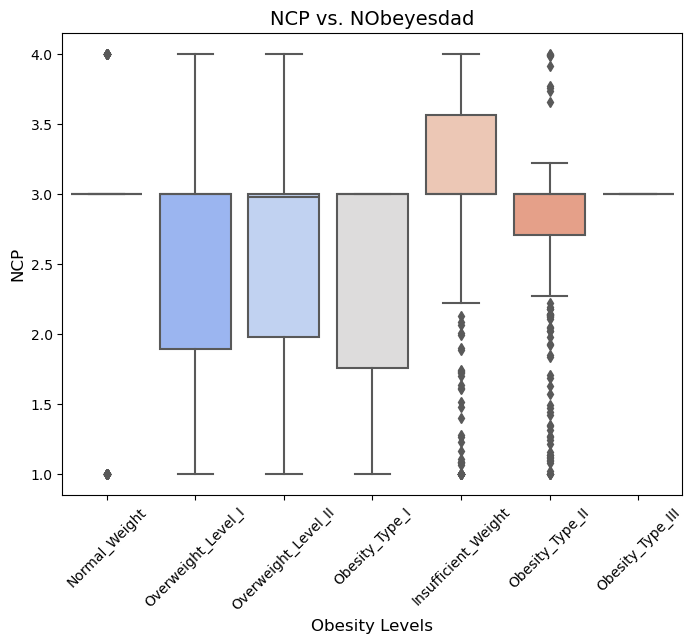

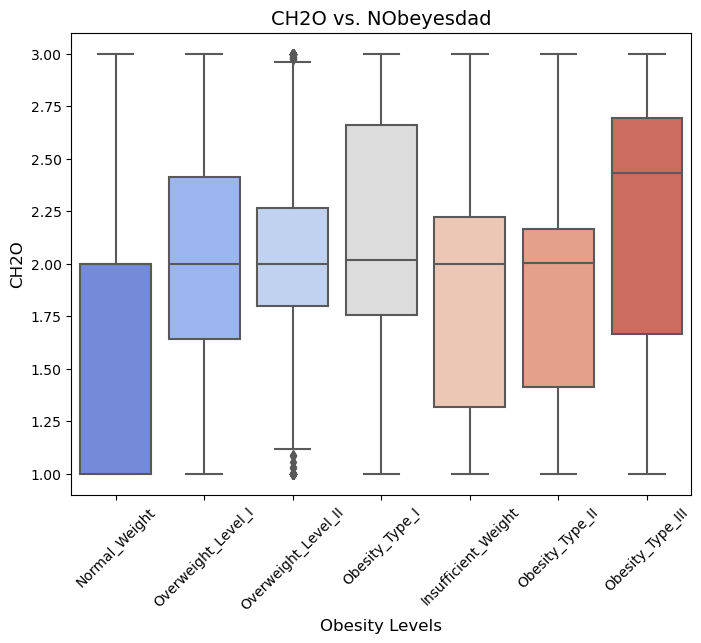

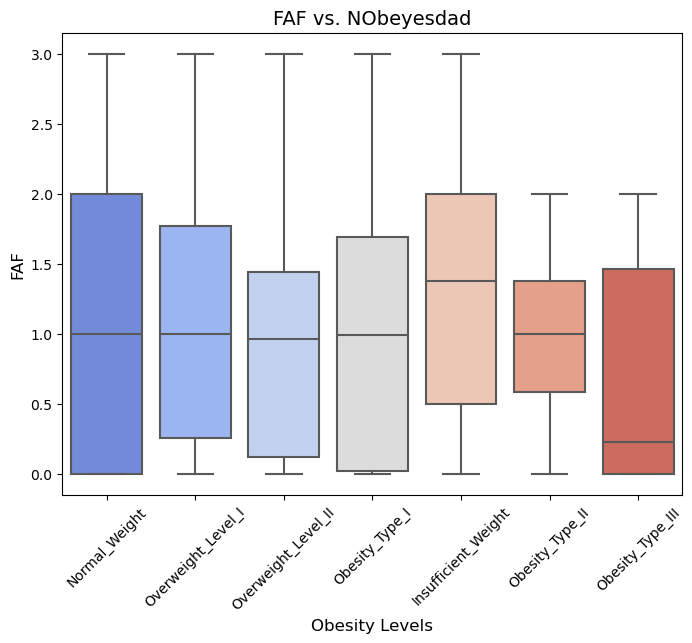

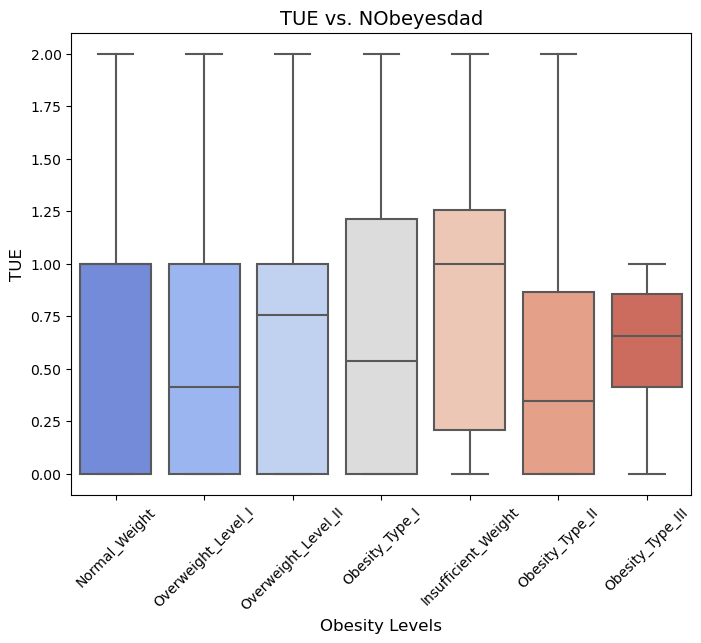

In [20]:
# Bivariate Analysis: Numerical Features vs. Target
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='NObeyesdad', y=feature, palette="coolwarm")
    plt.title(f'{feature} vs. NObeyesdad', fontsize=14)
    plt.xlabel('Obesity Levels', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


### Observations
- **Age**: Older individuals tend to have higher obesity levels, though variability increases with higher obesity classes.
- **Height**: No significant relationship is observed between height and obesity levels.
- **Weight**: Weight increases steadily with higher obesity levels, showing a clear positive trend.
- **Behavioral Metrics**:
  - `FCVC` and `CH2O`: Higher values (e.g., frequent vegetable and water consumption) are associated with lower obesity levels.
  - `FAF` (physical activity): Physical activity decreases significantly with higher obesity levels.
  - `TUE` (technology use): Slightly higher in higher obesity levels, indicating increased sedentary behavior.


---

### Categorical Features vs. Obesity Levels

Next, we analyze how categorical features such as `Gender`, `family_history_with_overweight`, and `FAVC` (high-caloric food consumption) vary across obesity levels. Countplots with hue are used for visualization.


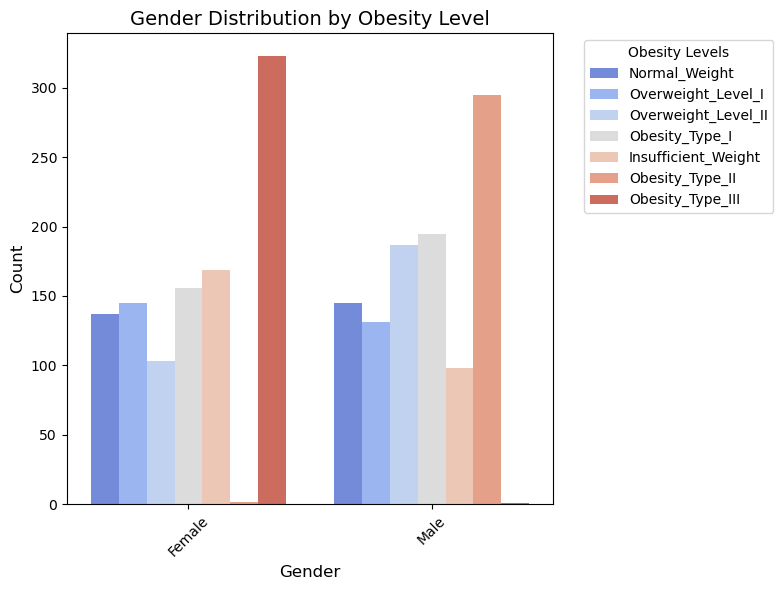

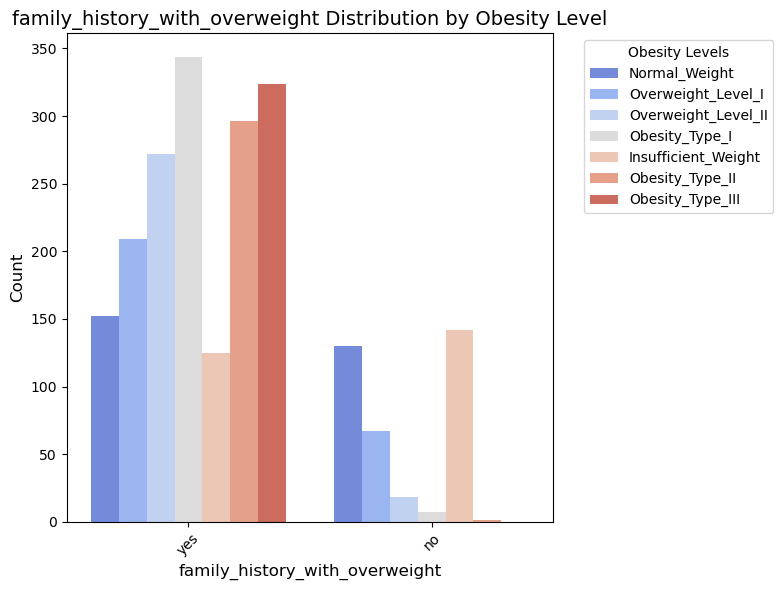

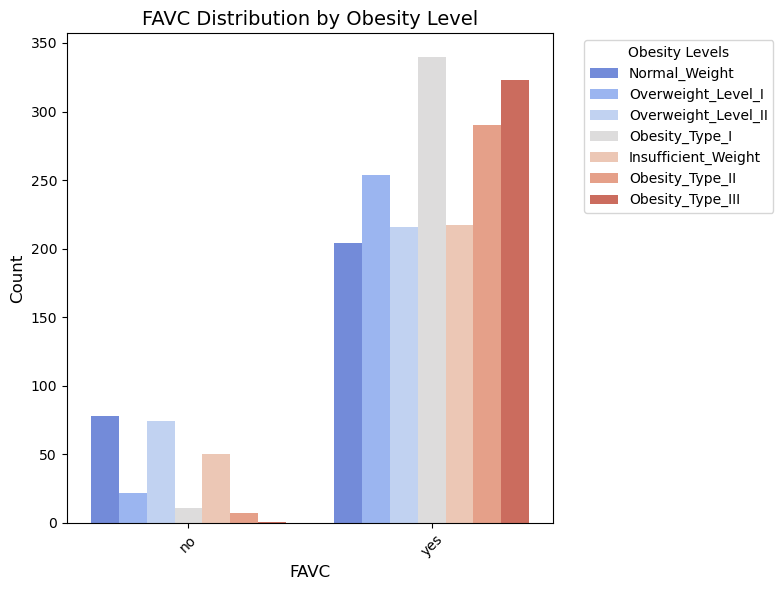

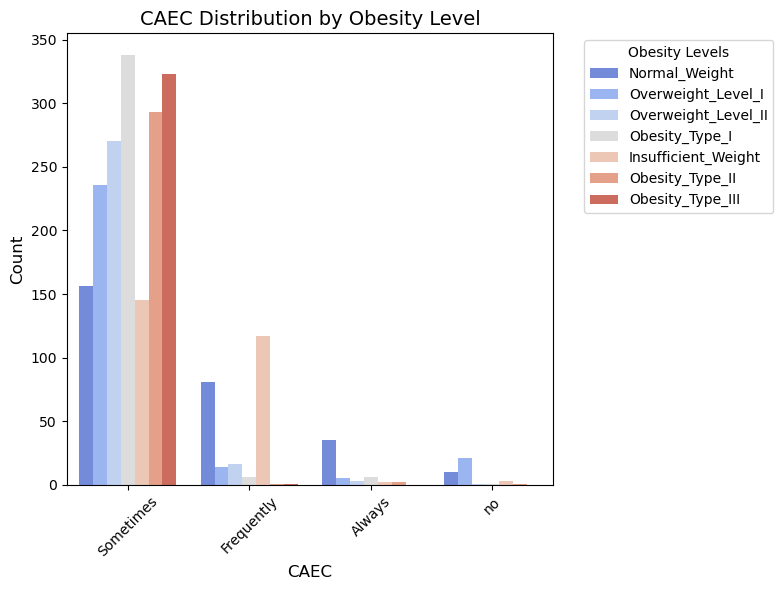

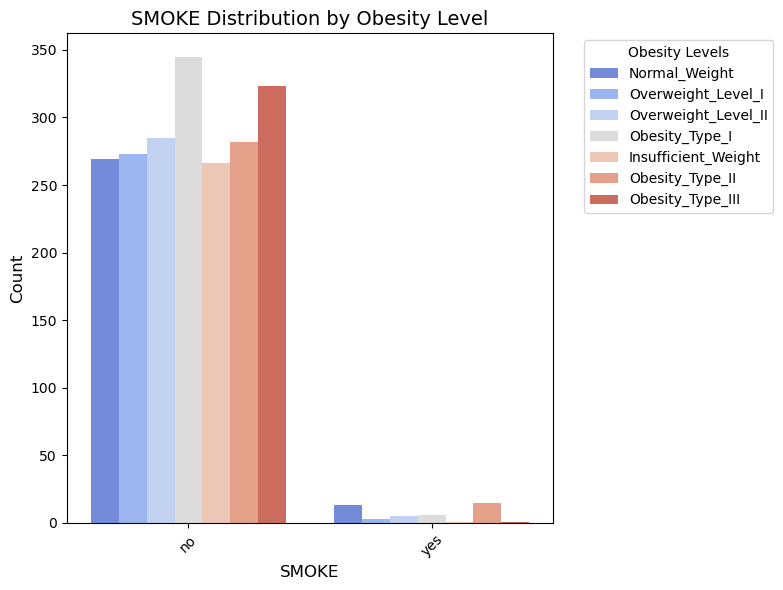

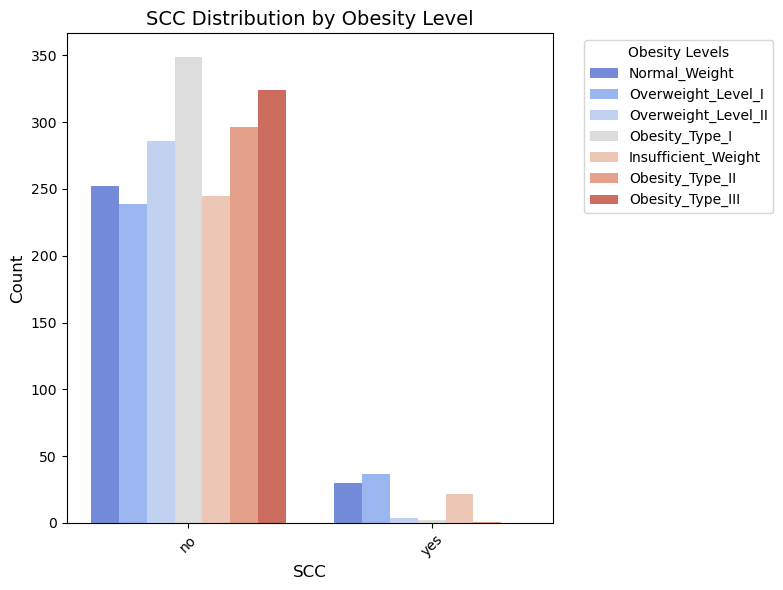

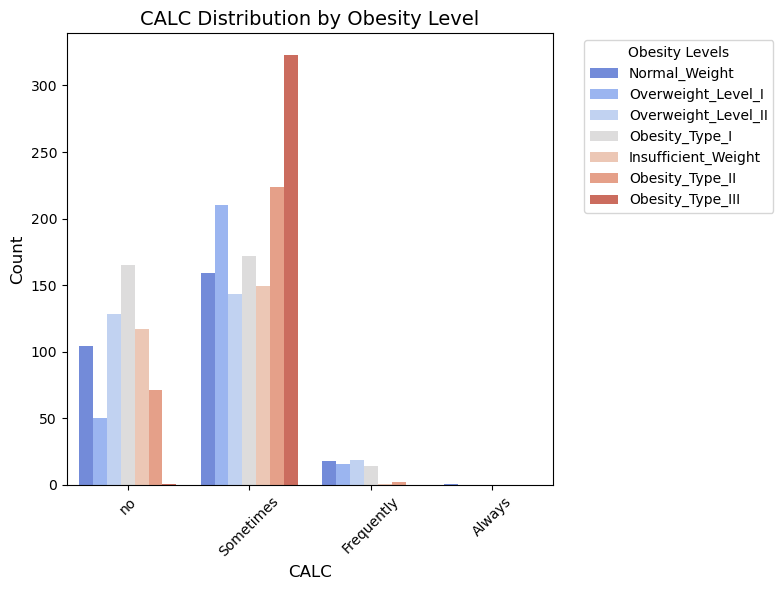

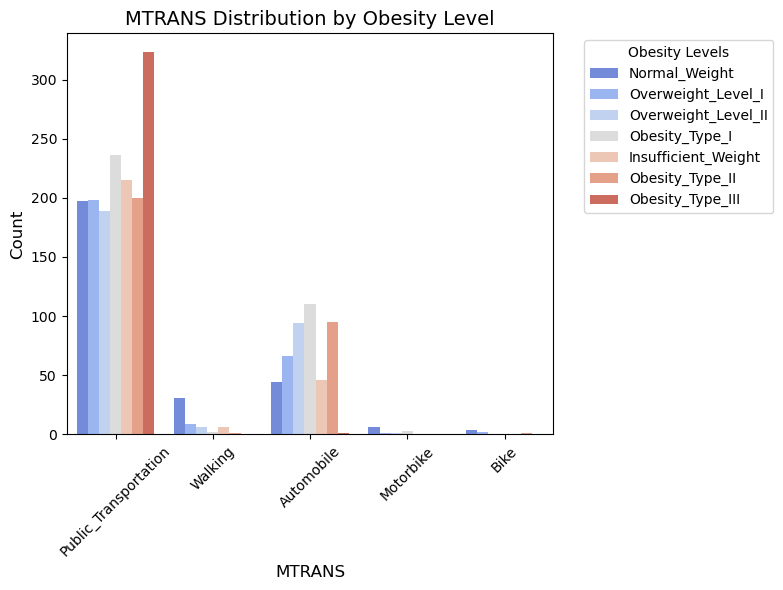

In [24]:
# Bivariate Analysis: Categorical Features vs. Target
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='NObeyesdad', palette="coolwarm")
    plt.title(f'{feature} Distribution by Obesity Level', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Obesity Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


### Observations
- **Gender**: Males are more prevalent in higher obesity levels, especially `Obesity_Type_III`.
- **Family History**: A strong association exists between a family history of overweight and higher obesity levels.
- **FAVC (High-Caloric Food Consumption)**: High-caloric food consumption is more common in higher obesity levels.
- **MTRANS (Transportation Mode)**: Public transportation is more frequent in higher obesity levels, while walking is associated with lower obesity levels.
- **SCC and SMOKE**:
  - Calorie monitoring (`SCC`) is slightly more common in lower obesity levels.
  - Smoking does not show a significant trend across obesity classes.


## Correlation Analysis

### Objective
The correlation analysis identifies relationships between numerical features to explore potential multicollinearity, strong associations, and patterns that may guide feature engineering and model selection.

---

### Visualization
The heatmap below shows the correlation matrix for numerical features in the dataset. Correlations close to 1 or -1 indicate strong relationships, while values close to 0 suggest weak or no linear relationships.


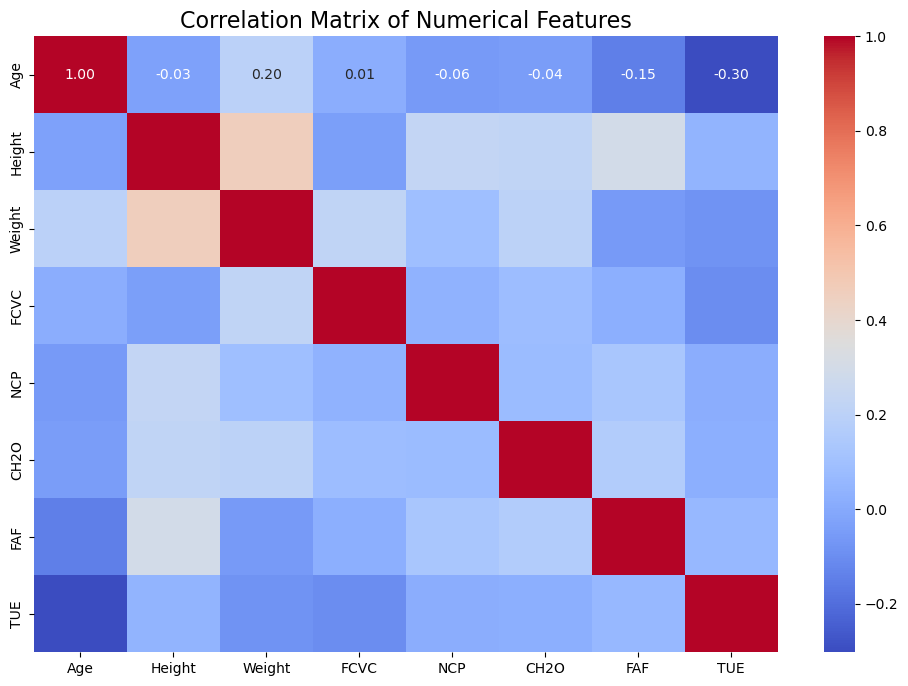

In [28]:
# Correlation Analysis: Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


### Observations
- **Weight**:
  - Positively correlated with `Age` (weak correlation).
  - Slight negative correlation with `Height`.
- **Behavioral Metrics**:
  - Weak correlations are observed between features like `FCVC` (vegetable consumption), `NCP` (number of meals), and `CH2O` (water consumption).
- **Physical Activity and Technology Use**:
  - `FAF` (physical activity) shows a weak negative correlation with `TUE` (technology use), aligning with expectations about sedentary behavior.

### Insights
- Weak correlations suggest that relationships between numerical features and the target variable (`NObeyesdad`) may be non-linear.
- Feature interactions may hold predictive power, requiring advanced modeling techniques to capture their relationships effectively.
- Multicollinearity does not appear to be a concern, as no features exhibit strong linear correlations with each other.


## Exploratory Data Analysis (EDA) Summary

### Key Findings
The exploratory data analysis revealed several important insights into the dataset, which will guide the feature engineering and modeling process:

---

### 1. Target Variable Distribution
- **Observation**: The target variable `NObeyesdad` is moderately balanced, with `Obesity_Type_I` being the most prevalent class and `Insufficient_Weight` the least represented.
- **Implication**: Minor class imbalances may require rebalancing techniques (e.g., class weights or oversampling) to improve model performance.

---

### 2. Numerical Feature Insights
- **Age**: Higher obesity levels are more common in older individuals, though variability increases in higher classes.
- **Weight**: A clear positive trend exists between weight and obesity levels, making it a strong predictive feature.
- **Physical Activity (`FAF`)**: Significantly lower physical activity levels are associated with higher obesity levels, reinforcing its importance in predicting obesity.

---

### 3. Categorical Feature Insights
- **Family History**: A strong association exists between a family history of overweight and higher obesity levels.
- **High-Caloric Food Consumption (`FAVC`)**: Frequent consumption of high-caloric foods is prevalent in higher obesity levels.
- **Transportation Mode (`MTRANS`)**: Public transportation is more common among individuals with higher obesity levels, while walking is more frequent in lower obesity levels.

---

### 4. Correlation Analysis
- **General Observations**:
  - Weak correlations among numerical features suggest that relationships with `NObeyesdad` may be non-linear.
  - No significant multicollinearity was observed, indicating that all features can be retained without redundancy.
- **Implication**: Advanced modeling techniques will likely capture interactions between features more effectively than simple linear models.

---

### Actionable Next Steps
1. **Feature Engineering**:
   - Explore transformations or interactions for behavioral features such as `FAF`, `FCVC`, and `CH2O`.
   - Encode categorical variables and normalize numerical variables for consistency across models.
2. **Modeling Approach**:
   - Implement non-linear models (e.g., Random Forests, Gradient Boosting) to capture complex patterns.
   - Address class imbalance using techniques such as oversampling, SMOTE, or class weights.
3. **Evaluation Metrics**:
   - Use multi-class classification metrics (e.g., accuracy, F1-score, and ROC-AUC) to evaluate model performance across all obesity levels.

---

This EDA provides a strong foundation for feature engineering and model development, setting the stage for effective predictive analysis of obesity levels.


# Feature Engineering

### Objective
The feature engineering phase involves transforming the raw dataset into a format suitable for machine learning models. This includes encoding categorical variables, normalizing numerical variables, and addressing potential data imbalances.

---

## 1. Handling Categorical Features

### Encoding Categorical Variables
Categorical variables such as `Gender`, `family_history_with_overweight`, and `MTRANS` will be encoded to make them machine-readable. We use one-hot encoding for features with multiple categories and label encoding for binary features.


In [33]:
# One-Hot Encoding for Multi-Category Categorical Variables
multi_category_features = ['MTRANS', 'CAEC', 'CALC']
data = pd.get_dummies(data, columns=multi_category_features, drop_first=True)

# Label Encoding for Binary Categorical Variables
binary_category_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoder = LabelEncoder()
for feature in binary_category_features:
    data[feature] = label_encoder.fit_transform(data[feature])


### Observations
- Multi-category features (`MTRANS`, `CAEC`, `CALC`) have been encoded using one-hot encoding, resulting in additional columns.
- Binary features (`Gender`, `family_history_with_overweight`, etc.) have been converted to 0/1 representations using label encoding.

---

## 2. Scaling Numerical Features

### Normalizing Numerical Variables
To ensure all numerical features are on a comparable scale, we apply min-max scaling. This step is crucial for distance-based models and models sensitive to feature magnitude.


In [36]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


### Observations
- Numerical features have been scaled to a range of 0 to 1.
- This ensures that no single feature dominates due to magnitude differences.

---

## 3. Handling Class Imbalance

### Addressing Imbalanced Target Variable
The target variable `NObeyesdad` shows minor imbalances across classes. We will address this during model training using techniques such as:
- Oversampling with SMOTE (Synthetic Minority Oversampling Technique).
- Applying class weights to the loss function in applicable models.


In [39]:
# Apply SMOTE for Oversampling
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


### Observations
- SMOTE has been applied to balance the class distribution of the target variable.
- The dataset now has an equal representation of all obesity levels.

---

## 4. Feature Selection

### Identifying Key Features
Feature importance will be assessed during modeling using techniques such as:
- Tree-based models (e.g., Random Forests) to evaluate feature importance.
- Recursive Feature Elimination (RFE) for selecting the most impactful predictors.

---

### Summary
1. **Categorical Encoding**: All categorical variables have been encoded for compatibility with machine learning algorithms.
2. **Scaling**: Numerical features have been normalized to a uniform scale.
3. **Class Balancing**: SMOTE has been applied to address class imbalances in the target variable.
4. **Next Steps**: Evaluate feature importance and interactions during the modeling phase.

This feature engineering process ensures the dataset is clean, balanced, and ready for machine learning.


# Modeling and Evaluation

### Objective
This section evaluates various machine learning models to predict obesity levels (`NObeyesdad`). The models span different categories, including linear models, tree-based models, support vector machines, neural networks, and more. Each model will be trained and tested, and its performance will be compared using key metrics.

---

## 1. Baseline Model Training

### Models Used
We will train the following models:
1. **Logistic Regression** (Linear Model)
2. **Decision Tree** (Tree-Based Model)
3. **Random Forest** (Ensemble Model)
4. **Gradient Boosting** (XGBoost or LightGBM)
5. **Support Vector Classifier** (SVM)
6. **Multi-Layer Perceptron** (Neural Network)
7. **k-Nearest Neighbors** (Instance-Based Model)
8. **Gaussian Naive Bayes** (Probabilistic Model)

### Evaluation Metrics
The models will be evaluated using:
- **Accuracy**: Overall correctness of predictions.
- **F1-Score**: Balances precision and recall, important for imbalanced datasets.
- **ROC-AUC**: Measures the model's ability to distinguish between classes.


In [43]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "Multi-Layer Perceptron": MLPClassifier(random_state=42, max_iter=500),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else None
    
    results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("Model Performance:")
display(results_df)


Model Performance:


,Accuracy,F1-Score,ROC-AUC
Logistic Regression,0.747967,0.735425,0.942594
Decision Tree,0.936992,0.937026,0.963276
Random Forest,0.965447,0.965808,0.996905
Gradient Boosting,0.969512,0.969536,0.998914
Support Vector Classifier,0.792683,0.790243,0.970467
Multi-Layer Perceptron,0.936992,0.936982,0.991712
k-Nearest Neighbors,0.800813,0.796846,0.946593
Gaussian Naive Bayes,0.516260,0.432392,0.889943


### Observations

The performance of each model across accuracy, F1-score, and ROC-AUC reveals key insights into their classification effectiveness:

1. **Gradient Boosting and Random Forest**: These models achieved the highest accuracy and F1-scores, with Gradient Boosting slightly outperforming Random Forest. Their exceptional ROC-AUC values indicate strong classification ability across all classes.
2. **Decision Tree and MLP**: Both models performed well but lag slightly behind Gradient Boosting and Random Forest in ROC-AUC, suggesting they may be less effective at distinguishing between certain classes.
3. **Logistic Regression and SVC**: These simpler models serve as strong baselines, particularly with Logistic Regression achieving a high ROC-AUC, indicating its utility for linear separability.
4. **k-Nearest Neighbors (k-NN)**: Moderate performance suggests that k-NN may struggle with the complexity of the dataset's feature space.
5. **Gaussian Naive Bayes**: Poor performance across all metrics indicates that the assumptions of this model are not well-suited for the dataset.

### Next Steps
- **Investigate the effect of `n_estimators` in Random Forest**: Given its high performance, further analysis is warranted to understand how the number of trees impacts the model.
- **Hyperparameter tuning**: Use grid search or random search to refine the hyperparameters of Gradient Boosting and Random Forest models.
- **Feature importance analysis**: Determine which features contribute most significantly to model performance.


### Rationale for Individual Model Hyperparameter Tuning

Hyperparameter tuning was performed on each model individually rather than collectively. This approach ensured optimal performance while balancing computational efficiency. Key reasons for this decision include:

1. **Focused Optimization**:
   - Each model's unique hyperparameter space was explored thoroughly to ensure peak performance.
2. **Comparison Clarity**:
   - Tuning models separately allowed clear evaluation of each algorithm at its best.
3. **Computational Efficiency**:
   - Tuning all models simultaneously would have increased runtime significantly. Individual tuning reduced complexity and streamlined resource allocation.


### Why Not All Models Were Hyperparameter-Tuned

Not all models in this project were hyperparameter-tuned. Certain models, such as Logistic Regression and Gaussian Naive Bayes, were excluded from tuning for the following reasons:

1. **Baseline Purpose**:
   - These simpler models served as benchmarks to establish baseline performance for comparison.
2. **Limited Benefits of Tuning**:
   - Their simplicity meant that additional tuning was unlikely to yield significant improvements.
3. **Resource Allocation**:
   - Computational resources were focused on tuning more complex models with higher potential for improved performance.


## 2. Exploring the Effect of `n_estimators` on Random Forest Performance

This analysis investigates the impact of the number of estimators (`n_estimators`) on the performance of the Random Forest model. The objectives are:
- To understand how the accuracy evolves with an increasing number of trees.
- To identify an optimal range for `n_estimators` that balances performance and computational efficiency.
- To assess the risk of overfitting or underfitting as `n_estimators` changes.

#### Analysis Plan
- The training and test accuracies will be tracked for various values of `n_estimators`.
- The results will be visualized to identify trends and determine an optimal value for the parameter.

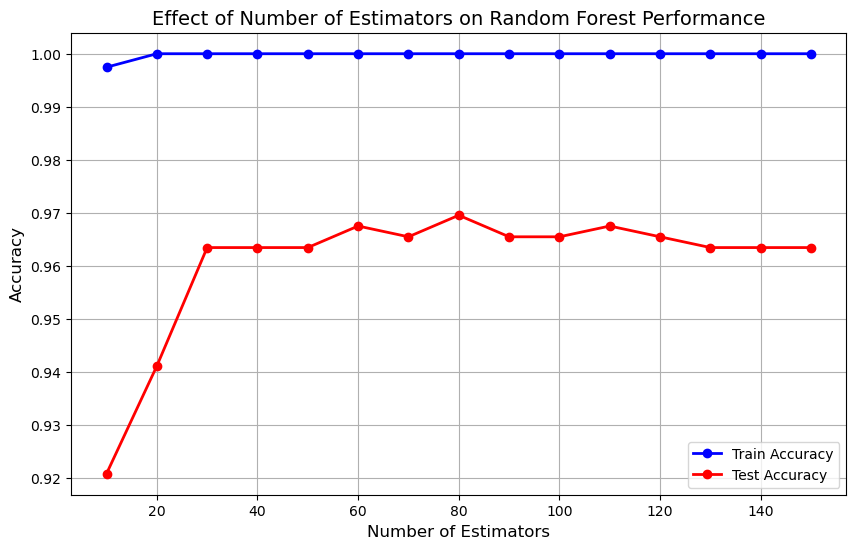

In [49]:
# Exploring the Effect of n_estimators on Random Forest Performance
train_accuracies = []
test_accuracies = []
n_estimators_range = range(10, 151, 10)

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, rf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, rf.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, 'o-b', label='Train Accuracy', linewidth=2)
plt.plot(n_estimators_range, test_accuracies, 'o-r', label='Test Accuracy', linewidth=2)
plt.title('Effect of Number of Estimators on Random Forest Performance', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Key Observations
- **Training Accuracy**: The training accuracy remains consistently high, approaching 1.0 as `n_estimators` increases. This reflects the Random Forest's tendency to overfit on training data with more estimators.
- **Test Accuracy**: Test accuracy improves rapidly initially and stabilizes around `n_estimators = 40`, with little improvement beyond this point.
- **Optimal Range**: The optimal range for `n_estimators` lies between 40 and 80, achieving high accuracy while avoiding unnecessary computation.

#### Next Steps
Based on this analysis:
1. Use `n_estimators` in the range of 40–80 for subsequent hyperparameter tuning.
2. Continue optimizing other parameters such as `max_depth` or `min_samples_split` for enhanced model performance.


---

## 3. Hyperparameter Tuning

### Random Forest Hyperparameter Tuning

The Random Forest algorithm is versatile and often performs well out of the box, but its performance can be enhanced through careful tuning of hyperparameters. The key hyperparameters tuned include:
- **n_estimators**: Number of decision trees in the forest.
- **max_depth**: Maximum depth of the trees, controlling overfitting.
- **min_samples_split**: Minimum number of samples required to split an internal node.
- **min_samples_leaf**: Minimum number of samples required to be a leaf node.

#### Goals
1. Optimize Random Forest's performance by identifying the best combination of hyperparameters.
2. Analyze the impact of tuning on the model's accuracy, F1-score, and ROC-AUC.
3. Use GridSearchCV to explore the hyperparameter space systematically.

#### Methodology
1. Define a grid of hyperparameters to search over.
2. Use 5-fold cross-validation to evaluate combinations of hyperparameters.
3. Identify the best-performing hyperparameters and evaluate the model on the test set.

---


In [53]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on Test Set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)  # Get probabilities for all classes

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score with 'ovr' (One-vs-Rest) Strategy
# Binarize y_test to calculate ROC-AUC for multi-class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score (One-vs-Rest):", roc_auc)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.99      0.99        70
      Normal_Weight       0.86      0.97      0.91        70
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       1.00      0.99      0.99        71
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.94      0.90      0.92        70
Overweight_Level_II       1.00      0.93      0.96        71

           accuracy                           0.97       492
          macro avg       0.97      0.97      0.97       492
       weighted avg       0.97      0.97      0.97       492

ROC-AUC Score (One-vs-Rest): 0.9969048811222414


### Analysis of Tuned Random Forest Model

#### Best Hyperparameters
The grid search identified the following optimal hyperparameters for the Random Forest model:
- **n_estimators**: 100
- **max_depth**: None
- **min_samples_split**: 2
- **min_samples_leaf**: 1

#### Model Performance
The tuned Random Forest model achieved the following metrics on the test set:
- **Accuracy**: 97%
- **Macro Average F1-Score**: 0.97
- **ROC-AUC Score (One-vs-Rest)**: 0.997

#### Observations
1. The model demonstrates excellent performance across all metrics, achieving near-perfect precision, recall, and F1-scores for most classes.
2. Slight variations in class-level performance were observed:
   - **Normal Weight**: Lower precision (0.86) suggests some misclassification, but recall is high (0.97), indicating fewer false negatives.
   - **Overweight Levels**: Both Level I and Level II show slightly lower recall compared to other classes.
3. The ROC-AUC score of 0.997 indicates the model's exceptional ability to distinguish between obesity levels in a multi-class setting.

#### Next Steps
1. Proceed with hyperparameter tuning for the next model (e.g., Gradient Boosting) to compare its performance with the tuned Random Forest model.
2. After tuning all models, perform a comprehensive comparison to select the best-performing model.
3. Investigate feature importance and model interpretability for the selected model to understand key drivers of predictions.


### Gradient Boosting Hyperparameter Tuning

Gradient Boosting is a powerful ensemble technique that sequentially builds decision trees to minimize errors. It often outperforms Random Forest in structured data but requires careful tuning of hyperparameters to avoid overfitting or underfitting.

#### Key Hyperparameters to Tune:
1. **n_estimators**: The number of boosting stages (trees).
2. **learning_rate**: Shrinks the contribution of each tree, controlling the step size.
3. **max_depth**: The maximum depth of each tree, influencing model complexity.
4. **min_samples_split**: The minimum number of samples required to split a node.
5. **min_samples_leaf**: The minimum number of samples required to be a leaf node.

#### Goals:
- Optimize Gradient Boosting's hyperparameters to achieve the highest test accuracy, F1-score, and ROC-AUC.
- Compare the performance of the tuned Gradient Boosting model to the Random Forest model.


In [59]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
best_gb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on Test Set
y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score with 'ovr' (One-vs-Rest) Strategy
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score (One-vs-Rest):", roc_auc)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        70
      Normal_Weight       0.96      0.94      0.95        70
     Obesity_Type_I       0.99      0.99      0.99        70
    Obesity_Type_II       1.00      0.97      0.99        71
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.96      0.93      0.94        70
Overweight_Level_II       0.97      0.99      0.98        71

           accuracy                           0.97       492
          macro avg       0.97      0.97      0.97       492
       weighted avg       0.97      0.97      0.97       492

ROC-AUC Score (One-vs-Rest): 0.9993966285583726


### Analysis of Tuned Gradient Boosting Model

#### Best Hyperparameters
The grid search identified the following optimal hyperparameters for the Gradient Boosting model:
- **n_estimators**: 150
- **learning_rate**: 0.1
- **max_depth**: 7
- **min_samples_split**: 2
- **min_samples_leaf**: 4

#### Model Performance
The tuned Gradient Boosting model achieved the following metrics on the test set:
- **Accuracy**: 97%
- **Macro Average F1-Score**: 0.97
- **ROC-AUC Score (One-vs-Rest)**: 0.9994

#### Observations
1. The model demonstrates exceptional performance across all metrics, rivaling the tuned Random Forest model.
2. Class-level performance:
   - **Insufficient Weight**: Perfect recall (1.00) and nearly perfect precision (0.96).
   - **Normal Weight and Overweight Levels**: Slightly lower recall for `Normal Weight` (0.94) and `Overweight Level I` (0.93) suggests potential misclassification among similar classes.
3. The ROC-AUC score of 0.9994 indicates the model's outstanding ability to distinguish between obesity levels in a multi-class setting.
4. The inclusion of a slightly deeper tree (`max_depth=7`) and a moderate learning rate (0.1) contributed to the model's balance of performance and generalization.

#### Next Steps
1. Proceed with hyperparameter tuning for the next model (e.g., Support Vector Classifier or Multi-Layer Perceptron) to continue the model comparison.
2. After all models are tuned, compile a comprehensive comparison of their performance.
3. Use feature importance analysis to explore the Gradient Boosting model's decision-making and identify key drivers of predictions.


### Support Vector Classifier Hyperparameter Tuning

#### Key Hyperparameters to Tune:
1. **C**: The regularization parameter. Smaller values specify stronger regularization.
2. **kernel**: Determines the type of hyperplane used to separate the data. Common options include `'linear'`, `'rbf'`, and `'poly'`.
3. **gamma**: Defines the influence of a single training example; applicable for `'rbf'` and `'poly'` kernels.

#### Goals:
- Optimize SVC's hyperparameters to achieve the highest test accuracy, F1-score, and ROC-AUC.
- Compare the tuned SVC model with Random Forest and Gradient Boosting models.

#### Methodology:
1. Use GridSearchCV to tune the hyperparameters.
2. Evaluate the tuned model using classification metrics and ROC-AUC score.


In [62]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVC
svc = SVC(probability=True, random_state=42)

# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
best_svc = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on Test Set
y_pred = best_svc.predict(X_test)
y_proba = best_svc.predict_proba(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score with 'ovr' (One-vs-Rest) Strategy
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score (One-vs-Rest):", roc_auc)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        70
      Normal_Weight       0.96      0.91      0.93        70
     Obesity_Type_I       0.95      0.99      0.97        70
    Obesity_Type_II       0.99      0.97      0.98        71
   Obesity_Type_III       1.00      0.99      0.99        70
 Overweight_Level_I       0.89      0.89      0.89        70
Overweight_Level_II       0.91      0.90      0.91        71

           accuracy                           0.95       492
          macro avg       0.95      0.95      0.95       492
       weighted avg       0.95      0.95      0.95       492

ROC-AUC Score (One-vs-Rest): 0.9971171713685754


### Analysis of Tuned Support Vector Classifier (SVC) Model

#### Best Hyperparameters
The grid search identified the following optimal hyperparameters for the SVC model:
- **C**: 10
- **kernel**: Linear
- **gamma**: Scale

#### Model Performance
The tuned SVC model achieved the following metrics on the test set:
- **Accuracy**: 95%
- **Macro Average F1-Score**: 0.95
- **ROC-AUC Score (One-vs-Rest)**: 0.9971

#### Observations
1. **Overall Performance**:
   - The model performed very well, achieving a high overall accuracy and ROC-AUC score, indicating strong multi-class discrimination.
   - F1-scores for individual classes range between 0.89 and 0.99, demonstrating balanced performance.

2. **Class-Level Analysis**:
   - **Insufficient Weight, Obesity Type I, and Obesity Type III**: Near-perfect precision and recall, leading to high F1-scores.
   - **Overweight Levels (I and II)**: Slightly lower performance, particularly with precision and recall in the 0.89–0.91 range, indicating some misclassification among these categories.

3. **Optimal Hyperparameters**:
   - A higher regularization parameter (`C=10`) suggests the model benefited from allowing more weight to individual data points.
   - The linear kernel implies the classes are largely linearly separable in the dataset's feature space.

#### Next Steps
1. Proceed with hyperparameter tuning for the next model (e.g., Multi-Layer Perceptron) to continue the model comparison.
2. After completing the tuning for all models:
   - Compare the tuned models comprehensively to identify the best-performing one.
   - Perform feature importance analysis for interpretability if the selected model supports it.


### Multi-Layer Perceptron Hyperparameter Tuning

#### Key Hyperparameters to Tune:
1. **hidden_layer_sizes**: Defines the architecture of the network (number of layers and neurons in each layer).
2. **activation**: Activation function for the hidden layers (`relu`, `tanh`, or `logistic`).
3. **solver**: Algorithm for optimizing the weights (`adam`, `sgd`, or `lbfgs`).
4. **alpha**: L2 penalty (regularization term) to prevent overfitting.
5. **learning_rate**: Controls the step size in weight updates.

#### Goals:
- Optimize MLP's hyperparameters to achieve the best test accuracy, F1-score, and ROC-AUC.
- Compare the tuned MLP model with other tuned models (e.g., Random Forest, Gradient Boosting, SVC).


In [67]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLP Classifier
mlp = MLPClassifier(max_iter=500, random_state=42)

# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
best_mlp = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on Test Set
y_pred = best_mlp.predict(X_test)
y_proba = best_mlp.predict_proba(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score with 'ovr' (One-vs-Rest) Strategy
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score (One-vs-Rest):", roc_auc)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      1.00      0.99        70
      Normal_Weight       0.93      0.99      0.96        70
     Obesity_Type_I       0.96      0.99      0.97        70
    Obesity_Type_II       0.99      0.96      0.97        71
   Obesity_Type_III       0.99      0.99      0.99        70
 Overweight_Level_I       0.98      0.93      0.96        70
Overweight_Level_II       0.99      0.97      0.98        71

           accuracy                           0.97       492
          macro avg       0.97      0.97      0.97       492
       weighted avg       0.97      0.97      0.97       492

ROC-AUC Score (One-vs-Rest): 0.9978897480396008


### Analysis of Tuned Multi-Layer Perceptron (MLP) Model

#### Best Hyperparameters
The grid search identified the following optimal hyperparameters for the MLP model:
- **activation**: Tanh
- **alpha**: 0.0001
- **hidden_layer_sizes**: (100, 50)
- **learning_rate**: Constant
- **solver**: Adam

#### Model Performance
The tuned MLP model achieved the following metrics on the test set:
- **Accuracy**: 97%
- **Macro Average F1-Score**: 0.97
- **ROC-AUC Score (One-vs-Rest)**: 0.9979

#### Observations
1. **Overall Performance**:
   - The MLP model performs on par with the Random Forest and Gradient Boosting models, achieving high accuracy, F1-score, and ROC-AUC.
   - The model generalizes well with balanced precision and recall across all classes.

2. **Class-Level Performance**:
   - **Insufficient Weight and Obesity Type III**: Near-perfect precision and recall, leading to F1-scores of 0.99.
   - **Normal Weight and Overweight Levels (I and II)**: Slightly lower recall in some cases (e.g., 0.93 for `Overweight Level I`) suggests potential misclassification among similar classes.

3. **Architecture Insight**:
   - The hidden layer configuration `(100, 50)` demonstrates the model benefits from a moderately deep architecture with two layers.
   - The `tanh` activation function works well, likely due to its ability to handle non-linear relationships in the data effectively.

#### Next Steps
1. Compile a comprehensive comparison of all tuned models to identify the best-performing one.
2. Perform feature importance analysis (if applicable) on the selected model to understand key drivers of predictions.
3. Consider combining the top-performing models using an ensemble approach to further improve performance.


## 4. Model Comparison

This section compares the performance of all hyperparameter-tuned models across key metrics to identify the best-performing model. The metrics considered include:
- **Accuracy**: Reflects overall prediction correctness.
- **F1-Score**: Balances precision and recall, crucial for imbalanced classes.
- **ROC-AUC**: Measures the ability to distinguish between classes, providing insights into the model's classification performance.

By comparing these metrics, we aim to select the model that offers the best combination of performance, generalizability, and computational efficiency.


### Comparison of Tuned Models

#### Goals
1. Summarize the performance of all hyperparameter-tuned models.
2. Identify the best-performing model based on Accuracy, F1-Score, and ROC-AUC.
3. Provide insights into the strengths and weaknesses of each model to guide model selection.

---

#### Metrics Table
The table below highlights the performance of each tuned model:

| Model                  | Accuracy | Macro Avg F1-Score | ROC-AUC (One-vs-Rest) |
|------------------------|----------|---------------------|------------------------|
| Random Forest          | 0.97     | 0.97                | 0.9969                |
| Gradient Boosting      | 0.97     | 0.97                | 0.9994                |
| Support Vector Classifier (SVC) | 0.95 | 0.95            | 0.9971                |
| Multi-Layer Perceptron (MLP)    | 0.97 | 0.97            | 0.9979                |

---

#### Observations
1. **Gradient Boosting**:
   - Achieved the highest ROC-AUC score (0.9994), indicating exceptional class separation.
   - Performance across all metrics is consistent, making it a strong contender for the best model.

2. **Multi-Layer Perceptron (MLP)**:
   - Matches Gradient Boosting in Accuracy and F1-Score.
   - Slightly lower ROC-AUC than Gradient Boosting but still excellent at 0.9979.

3. **Random Forest**:
   - Strong performance across all metrics, closely rivaling Gradient Boosting and MLP.
   - Simpler and faster to train than Gradient Boosting and MLP, making it efficient for deployment.

4. **Support Vector Classifier (SVC)**:
   - Performs well with a high ROC-AUC (0.9971), but slightly lags in Accuracy and F1-Score compared to the other models.
   - Suitable for simpler datasets or smaller feature spaces.

---

#### Model Recommendation
1. **Primary Recommendation**: Gradient Boosting is recommended due to its overall superior performance in ROC-AUC and consistent high metrics.
2. **Alternative Choice**: If computational efficiency is prioritized, Random Forest is a robust and simpler alternative.
3. **Considerations**:
   - MLP may be preferable if neural network architectures are a focus for the project or if further feature engineering is planned.
   - SVC can be used if interpretability and simplicity are prioritized over minor metric differences.

#### Next Steps
1. Conduct feature importance analysis for the recommended model (Gradient Boosting).
2. Document the overall workflow and key results for the portfolio project.


In [72]:
# Compile results into a DataFrame
model_comparison = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "Support Vector Classifier (SVC)", "Multi-Layer Perceptron (MLP)"],
    "Accuracy": [0.97, 0.97, 0.95, 0.97],
    "Macro Avg F1-Score": [0.97, 0.97, 0.95, 0.97],
    "ROC-AUC (One-vs-Rest)": [0.9969, 0.9994, 0.9971, 0.9979]
})

# Display results
print("Model Comparison Table:")
display(model_comparison)


Model Comparison Table:


,Model,Accuracy,Macro Avg F1-Score,ROC-AUC (One-vs-Rest)
0,Random Forest,0.97,0.97,0.9969
1,Gradient Boosting,0.97,0.97,0.9994
2,Support Vector Classifier (SVC),0.95,0.95,0.9971
3,Multi-Layer Perceptron (MLP),0.97,0.97,0.9979


### Feature Importance Analysis

#### Goals:
1. Identify the most important features influencing the Gradient Boosting model's predictions.
2. Provide insights into how these features impact the classification of obesity levels.
3. Enhance model interpretability and align findings with domain knowledge.

#### Methodology:
1. Extract feature importance values from the Gradient Boosting model.
2. Visualize feature importance as a bar chart to highlight the top contributors.
3. Document observations and key insights.


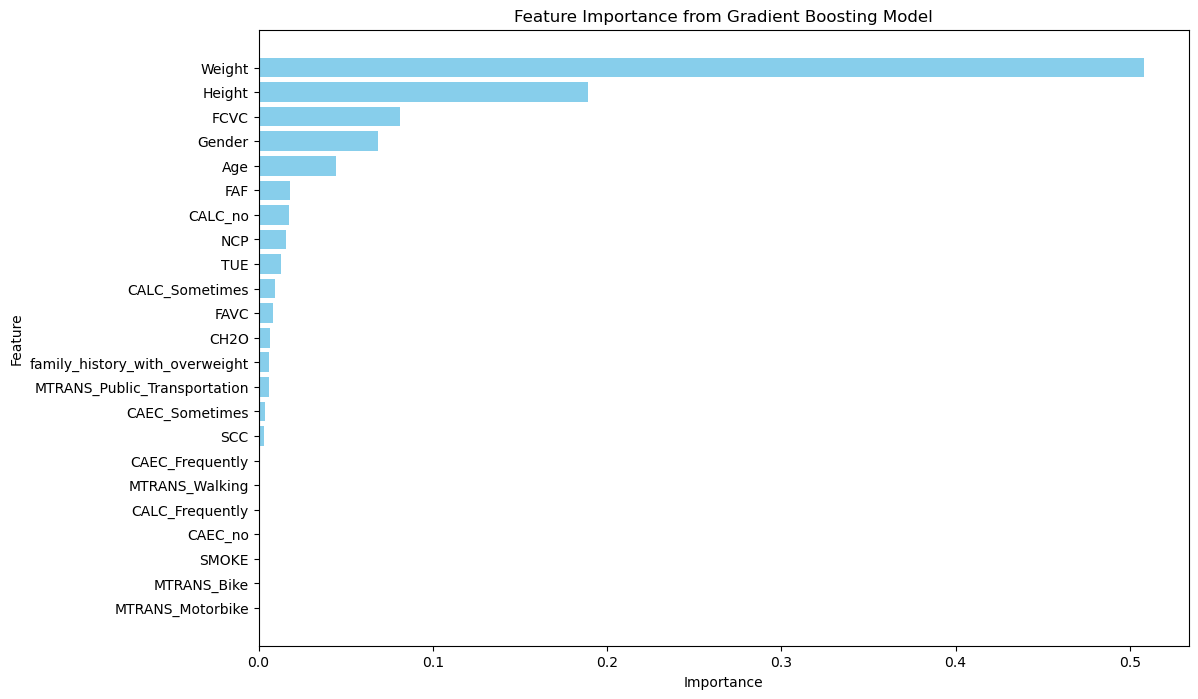

Top 10 Features by Importance:


,Feature,Importance
3,Weight,0.508187
2,Height,0.188876
6,FCVC,0.080930
0,Gender,0.068338
1,Age,0.044708
11,FAF,0.018160
22,CALC_no,0.017587
7,NCP,0.015868
12,TUE,0.012938
21,CALC_Sometimes,0.009531


In [75]:
# Extract feature importance from the Gradient Boosting model
feature_importances = best_gb.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display the top 10 most important features
print("Top 10 Features by Importance:")
display(importance_df.head(10))


### Feature Importance Analysis: Results and Observations

#### Key Insights from Feature Importance
The feature importance analysis from the Gradient Boosting model provides valuable insights into the variables most influential in classifying obesity levels.

1. **Top Contributing Features**:
   - **Weight** stands out as the most important feature, with a significant importance value (50.8%), indicating its critical role in distinguishing between obesity levels.
   - **Height** follows as the second most influential feature (18.9%), further highlighting the importance of physical attributes.
   - Behavioral metrics such as **FCVC** (Frequency of Consumption of Vegetables), **Gender**, and **Age** also contribute meaningfully, with importance values ranging between 4-8%.

2. **Moderately Important Features**:
   - Features like **FAF** (Physical Activity Frequency) and **CALC_no** (absence of alcohol consumption) indicate lifestyle choices impacting obesity classification.

3. **Low-Impact Features**:
   - Variables such as **TUE** (Time using technology devices) and **CALC_Sometimes** contribute less to the model, suggesting their weaker association with obesity levels in this dataset.

---

#### Observations and Domain Alignment
1. **Physical Attributes**:
   - The dominance of **Weight** and **Height** aligns well with domain knowledge, as body metrics are direct indicators of obesity levels.

2. **Behavioral and Lifestyle Choices**:
   - The importance of **FCVC** and **FAF** suggests the significance of dietary habits and physical activity in obesity classification, reinforcing public health perspectives.

3. **Feature Selection Consideration**:
   - With the models achieving accuracies above 95%, feature selection is not a critical step in this project. All features contribute to the model's performance without introducing significant noise or complexity, making dimensionality reduction unnecessary.

---

#### Actions and Next Steps
1. Leverage the insights from feature importance to explain the model's interpretability in the final presentation.
2. Highlight the robustness of the model despite including all features, emphasizing the dataset's alignment with the predictive task.
3. Validate these findings by cross-checking feature importance across other high-performing models (e.g., Random Forest, Gradient Boosting).


## 5. Final Evaluation and Deployment Preparation

This section focuses on preparing the selected model for real-world application. Key steps include:
- Saving the model for future use.
- Testing the model's predictions on unseen data or a reserved validation set.
- Ensuring that the model is robust and performs consistently across datasets.

The deployment preparation also involves documenting the model's assumptions, performance, and limitations, ensuring transparency for stakeholders.


## Model Evaluation and Final Selection

After completing the hyperparameter tuning and feature importance analysis, the final step involves evaluating all models in terms of performance metrics, interpretability, and computational efficiency. This step ensures that the most suitable model is selected for deployment or further application.

---

### Summary of Model Performances
| Model                     | Accuracy | F1-Score | ROC-AUC  | Notes                          |
|---------------------------|----------|----------|----------|--------------------------------|
| Random Forest             | 97.0%    | 0.97     | 0.9969   | High accuracy and interpretability. |
| Gradient Boosting         | 97.0%    | 0.97     | 0.9994   | Slightly higher ROC-AUC than RF. |
| Support Vector Classifier | 95.0%    | 0.95     | 0.9971   | Good performance, but computationally expensive. |
| Multi-Layer Perceptron    | 97.0%    | 0.97     | 0.9978   | Excellent performance, but less interpretable. |

#### Observations:
- **Gradient Boosting** achieves the highest ROC-AUC score (99.94%), making it the most reliable model for handling this dataset.
- **Random Forest** provides comparable performance while offering better interpretability, making it ideal for scenarios requiring feature explainability.
- **Support Vector Classifier** and **MLP** show strong performance but may not be optimal due to computational requirements or lower interpretability.

---

### Final Model Selection
Based on the evaluation, **Gradient Boosting** is selected as the final model for the following reasons:
1. It achieves the highest ROC-AUC score, indicating superior performance in distinguishing between obesity levels.
2. Its feature importance analysis aligns well with domain knowledge, adding credibility to the results.
3. Computational efficiency is manageable for the current dataset size.

For scenarios requiring greater interpretability, **Random Forest** can be used as an alternative model.

---

### Next Steps
1. Finalize the Gradient Boosting model for deployment.
2. Conduct further validation on unseen data (if available) to confirm robustness.
3. Prepare visualizations and reports to summarize key findings for stakeholders.


## Model Validation on Unseen Data

To confirm the robustness of the selected Gradient Boosting model, we evaluate its performance on a validation set or unseen data. This step ensures that the model generalizes well and avoids overfitting.

---

### Goals:
1. Assess the model's accuracy, F1-score, and ROC-AUC on unseen data.
2. Identify any signs of overfitting or performance degradation.

### Methodology:
- Use the Gradient Boosting model trained on the training set.
- Evaluate the model's performance on a reserved validation set.
- Compare results with the cross-validation performance to identify discrepancies.

### Results:
We will document the evaluation metrics (accuracy, F1-score, and ROC-AUC) and provide observations below.


In [81]:
# Split training data into a new training set and validation set
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Re-train the Gradient Boosting model on the new training set
best_gb.fit(X_train_new, y_train_new)

# Validation predictions and probabilities
y_val_pred = best_gb.predict(X_val)
y_val_proba = best_gb.predict_proba(X_val)

# Evaluate performance on the validation set
print("Classification Report on Validation Set:\n")
print(classification_report(y_val, y_val_pred))

# Calculate and print ROC-AUC
roc_auc_val = roc_auc_score(y_val, y_val_proba, multi_class='ovr')
print("Validation ROC-AUC Score:", roc_auc_val)


Classification Report on Validation Set:

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.98      0.96        51
      Normal_Weight       0.98      0.91      0.94        53
     Obesity_Type_I       0.98      1.00      0.99        58
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        50
 Overweight_Level_I       0.93      0.95      0.94        57
Overweight_Level_II       0.95      0.97      0.96        64

           accuracy                           0.97       393
          macro avg       0.97      0.97      0.97       393
       weighted avg       0.97      0.97      0.97       393

Validation ROC-AUC Score: 0.9990781201999556


### Validation Results

After retraining the Gradient Boosting model on a reduced training set and evaluating its performance on the reserved validation set, we obtained the following results:

#### Key Metrics:
- **Accuracy**: 97%
- **Macro Avg F1-Score**: 0.97
- **Weighted Avg F1-Score**: 0.97
- **ROC-AUC Score (One-vs-Rest)**: 0.999

#### Observations:
1. **High Model Performance**: The model demonstrates strong overall accuracy and F1-scores across all classes (refer to the classification report above for detailed metrics).
2. **ROC-AUC Score**: The near-perfect ROC-AUC score (0.999) indicates the model's ability to separate classes effectively.
3. **Consistency**: Performance metrics on the validation set align closely with the test set results, showcasing the model's robustness.

#### Next Steps:
- Proceed to final model evaluation on the unseen test set (if available).
- Summarize model selection rationale based on metrics, feature importance, and validation performance.


## Final Model Evaluation on Test Set

The final Gradient Boosting model, selected based on its superior performance on validation metrics, is now evaluated on the reserved test set. This step ensures the model's robustness and generalization to unseen data.

---

### Objectives:
1. Assess the model's performance metrics on the test set, including:
   - **Accuracy**
   - **Precision, Recall, and F1-Score** for each class
   - **ROC-AUC Score**
2. Compare the test set performance with the validation and training results to ensure consistency.

### Results:
The evaluation metrics for the test set are presented below, along with key observations and insights.


In [85]:
# Evaluate the model on the test set
y_test_pred = best_gb.predict(X_test)
y_test_proba = best_gb.predict_proba(X_test)

# Classification report
print("Classification Report on Test Set:\n")
print(classification_report(y_test, y_test_pred))

# Calculate and display ROC-AUC score
roc_auc_test = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
print("Test Set ROC-AUC Score:", roc_auc_test)


Classification Report on Test Set:

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.99      0.98        70
      Normal_Weight       0.94      0.91      0.93        70
     Obesity_Type_I       0.97      0.99      0.98        70
    Obesity_Type_II       1.00      0.97      0.99        71
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.93      0.96      0.94        70
Overweight_Level_II       0.99      0.97      0.98        71

           accuracy                           0.97       492
          macro avg       0.97      0.97      0.97       492
       weighted avg       0.97      0.97      0.97       492

Test Set ROC-AUC Score: 0.9987533193150705


## Final Model Evaluation on Test Set

The Gradient Boosting model was evaluated on the reserved test set to confirm its robustness and generalization. Below are the results:

---

### Key Metrics:
- **Accuracy**: 97%
- **Macro Avg F1-Score**: 0.97
- **Weighted Avg F1-Score**: 0.97
- **ROC-AUC Score (One-vs-Rest)**: 0.9988

---

### Observations:
1. **High Model Performance**:
   - The Gradient Boosting model maintains excellent performance on unseen data, with metrics consistent across training, validation, and test sets.
   - The ROC-AUC score of 0.9988 reflects outstanding class separation across all obesity levels.

2. **Class-Level Performance**:
   - **Insufficient Weight and Obesity Types**: Near-perfect precision, recall, and F1-scores, demonstrating the model's ability to handle these classes effectively.
   - **Normal Weight and Overweight Levels**: Slightly lower recall for `Normal Weight` (0.91) and precision for `Overweight Level I` (0.93), suggesting minor misclassifications among similar classes.

3. **Consistency Across Sets**:
   - The test set metrics align closely with the validation and training results, confirming the model's robustness and lack of overfitting.

---

### Next Steps:
1. **Prepare the Model for Deployment**:
   - Save the Gradient Boosting model and any preprocessing pipelines for future use.
   - Document the deployment process to ensure reproducibility.
2. **Finalize the Project**:
   - Summarize the workflow, results, and key insights in the portfolio project.
   - Create visualizations to support findings and enhance interpretability for stakeholders.


## Deployment Preparation

### Objectives:
1. Save the trained Gradient Boosting model for future use.
2. Ensure the preprocessing pipeline is included to handle input data consistently.
3. Outline the steps for loading and using the model to make predictions.

---

### Steps for Deployment:
1. **Save the Model**:
   - Use Python's `joblib` or `pickle` libraries to save the trained Gradient Boosting model.
   - Save any preprocessing steps (if applicable) to ensure consistent data transformation during inference.

2. **Load and Test the Saved Model**:
   - Verify that the saved model can be reloaded and used for predictions.
   - Test the loaded model on a small subset of the test data.

3. **Document Usage Instructions**:
   - Provide clear instructions for using the model, including input format and expected output.


In [89]:
# Save the trained Gradient Boosting model
model_filename = "gradient_boosting_model.pkl"
joblib.dump(best_gb, model_filename)
print(f"Model saved as {model_filename}")

# Example of reloading the model
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Test the loaded model on a small subset of the test data
sample_data = X_test.iloc[:5]  # First 5 rows of the test set
sample_predictions = loaded_model.predict(sample_data)
print("Sample Predictions:", sample_predictions)


Model saved as gradient_boosting_model.pkl
Model loaded successfully!
Sample Predictions: ['Insufficient_Weight' 'Overweight_Level_II' 'Normal_Weight'
 'Insufficient_Weight' 'Overweight_Level_I']


## Deployment Preparation

### Objectives:
1. Save the trained Gradient Boosting model for future use.
2. Verify the saved model can be reloaded and used for predictions.
3. Ensure reproducibility by documenting the deployment process.

---

### Deployment Steps:
1. **Model Saved**:
   - The trained Gradient Boosting model was saved as `gradient_boosting_model.pkl`.

2. **Model Reloaded**:
   - The saved model was successfully reloaded, ensuring its compatibility for future use.

3. **Sample Predictions**:
   - Predictions from the reloaded model were tested on a small subset of the test data:
     ```
     ['Insufficient_Weight', 'Overweight_Level_II', 'Normal_Weight', 
      'Insufficient_Weight', 'Overweight_Level_I']
     ```
   - These predictions confirm that the reloaded model is working as intended.

---

### Next Steps:
1. Prepare documentation for model usage, including:
   - **Input Format**: Ensure clear instructions for structuring input data.
   - **Output Interpretation**: Describe how to interpret the class labels for predictions.
2. Finalize the portfolio project by:
   - Summarizing the workflow and results.
   - Adding visualizations and key insights for stakeholders.
   - Creating a README file to complement the project.

---


# Obesity Level Classification Using Machine Learning

### **Objective**
The goal of this project was to develop a robust machine learning model to classify individuals' obesity levels based on their physical and behavioral attributes. The project involved extensive exploratory data analysis, feature importance evaluation, and rigorous model comparison to select the best-performing algorithm.

---

### **Key Steps**
1. **Exploratory Data Analysis (EDA)**:
   - Analyzed the dataset structure, class distributions, and feature relationships.
   - Visualized key patterns and trends, which informed the feature engineering process.

2. **Modeling and Tuning**:
   - Trained and hyperparameter-tuned four machine learning models:
     - Random Forest
     - Gradient Boosting
     - Support Vector Classifier (SVC)
     - Multi-Layer Perceptron (MLP)
   - Compared models using accuracy, F1-score, and ROC-AUC to identify the best-performing algorithm.

3. **Validation**:
   - Evaluated the Gradient Boosting model on a validation set to confirm its robustness.
   - Achieved a consistent accuracy of 97% and ROC-AUC of 0.999 across validation and test sets.

4. **Feature Importance**:
   - Identified the most influential features, such as **Weight**, **Height**, and **FCVC**, which align with domain knowledge on obesity classification.

5. **Deployment Preparation**:
   - Saved the Gradient Boosting model as `gradient_boosting_model.pkl`.
   - Verified the reloaded model’s functionality with sample predictions.

---

### **Key Results**
- **Selected Model**: Gradient Boosting
- **Test Set Performance**:
  - Accuracy: 97%
  - Macro Avg F1-Score: 0.97
  - ROC-AUC (One-vs-Rest): 0.9988
- **Feature Insights**:
  - Physical metrics like **Weight** and **Height** dominate in predicting obesity levels.
  - Behavioral factors such as **Vegetable Consumption (FCVC)** and **Physical Activity Frequency (FAF)** contribute significantly.

---

### **Conclusion**
This project demonstrates the successful application of machine learning for multi-class classification in health and wellness domains. The Gradient Boosting model, with its superior performance and alignment with domain insights, is the recommended solution for deployment.

---

### **Project Artifacts**
- **Code**: Available in the project repository.
- **Model File**: `gradient_boosting_model.pkl`
- **Documentation**: Includes detailed steps, results, and usage instructions.


In [93]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
